**CONSIGNA**
1. Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


Carga de las imagenes de Will (original y a comparar)

In [1]:
import os
filenames = os.listdir("img")
filenames.sort()
print(filenames)

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


Calculo de la media (o media cuadrada) de intensidad de pixel de una imagen

In [2]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    acumulador = 0
    
    #se recorre la imagen
    for x in range(largo):
        for y in range(ancho):
            #y se van acumulando la suma de las intensidades
            if cuadrada:
                acumulador += int(imagen[x][y]) * int(imagen[x][y]) #se hacen conversiones a int xq... (completar)
            else:
                acumulador += int(imagen[x][y])
                
    #luego se divide el total por la cantidad de pixel y se obtiene la media
    return float(acumulador)/(largo*ancho)

Calculo del desvio estandar de intensidad de pixel de una imagen utilizando su media

In [3]:
def desvio(imagen, media_imagen):
    """
    desvio = sqrt(<x2> - <x>2)
    """
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    return desvio

Calculo de la correlación cruzada entre dos imagenes

In [4]:
def correlacion_cruzada(imagen_a,imagen_b):
    if(len(imagen_a)!= len(imagen_b) or len(imagen_a[0]) != len(imagen_b[0])):
        return

    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])

    return  float(suma_ambos)/(largo*ancho)

Calculo del factor de correlación cruzada entre dos imagenes

In [5]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

In [2]:
import os
import imageio

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

In [7]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1


Procesado imagen 1 ...
Procesado imagen 2 ...
Procesado imagen 3 ...
Procesado imagen 4 ...
Procesado imagen 5 ...


In [8]:
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0])

Imagen 1
Imagen 2
Imagen 3
Imagen 5
Imagen 4


Populating the interactive namespace from numpy and matplotlib


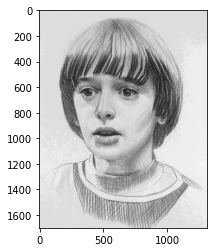

In [9]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(will_original,cmap='gray',vmin=0,vmax=255)
plt.show()

2- Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

In [10]:
def distribucion_intensidad(imagen):
    #posible mejora, en ves de usar un arreglo usar otra estructura
    #como un mapa o algo asi porque hay muchos valores de intesidad 
    #que no se usan
    dist = {} #esto nose si se hace asi -> joya
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=dist[key]/(largo*ancho)
    return dist

will_parecida = will_fotos_busqueda[0]

distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad0(will_parecida)
distribucion_policia = distribucion_intensidad(will_policia)

print(distribucion_original)
print(distribucion_parecida)
print(distribucion_policia)

NameError: name 'distribucion_intensidad0' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,6)

# Funcion para poner el label arriba de cada barrita
def autolabel(rects,ejes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round((float)(rect.get_height()),4)
        ejes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)

# funcion para generar histograma a partir de una distribucion
def generar_histograma(distribucion):
    valores = list(distribucion.values())
    intensidades = list(distribucion.keys())

    # configuracion del plotting
    figura = plt.figure()
    ejes = figura.add_axes([0,0,1,1])
    histograma = ejes.bar(intensidades,valores,width=14)
    plt.xticks(intensidades,intensidades)

    # titulos y labels
    ejes.set_title('Distribucion de intensidades')
    ejes.set_xlabel('Intesidad (0 a 255)')
    ejes.set_ylabel('Probabilidad')
    
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas
    plt.autoscale(False)

    # generar autolabels
    autolabel(histograma,ejes)

    # Mostrar el grafico
    plt.show()

generar_histograma(distribucion_original)
generar_histograma(distribucion_parecida)
generar_histograma(distribucion_policia)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def autolabel(rects,ax):
    for rect in rects:
      height = round((float)(rect.get_height()),4)
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',fontsize=10,rotation=90)
        
def histogram_multiple(distribucion1,label1,distribucion2,label2,distribucion3,label3):
    
    #ordenamos los diccionarios por clave (intensidades)
    d1 = OrderedDict(sorted(distribucion1.items()))
    d2 = OrderedDict(sorted(distribucion2.items()))
    d3 = OrderedDict(sorted(distribucion3.items()))
    b = OrderedDict(sorted(distribucion_original.items()))

    #obtenemos las intensidades a partir de cualquier diccionario
    intensidades = list(d1.keys())
    
    #obtenemos los valores
    d1_valores = list(d1.values())
    d2_valores = list(d2.values())
    d3_valores = list(d3.values())


    ind = np.arange(len(intensidades))  # the x locations for the groups
    width = 0.525  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar((ind - width/2)*2, d1_valores, width,
                    label=label1)
    rects2 = ax.bar((ind)*2, d2_valores, width,
                    label=label2)
    rects3 = ax.bar((ind + width/2)*2, d3_valores, width,
                    label=label3)
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probabilidad')
    ax.set_title('Distribución de intensidades')
    ax.set_xticks(ind*2)
    ax.set_xticklabels(intensidades)
    ax.legend()
    
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    fig.tight_layout()

    plt.show()
    
histogram_multiple(distribucion_original,'original',distribucion_parecida,'parecida',distribucion_policia,'policia')

In [ ]:
import math

def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    return math.sqrt(varianza)

distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")
    

3. Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original). Con dicho algoritmo codificador:
    - a) Comprimir con Huffman semi-estático la imagen original.
    - b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
    - c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
    - d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para  la propia imagen. Comparar con el resultado del inciso anterior.
    - e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d).
Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [ ]:
class Tree:
    def __init__(self,simbolo=None, prob=None, left=None, right=None):
        self.simbolo = simbolo
        self.prob = prob
        self.left = left
        self.right = right

    def is_leaf(self):
        return (self.left is None and self.right is None) 

    #def get_leaves(self):
    #  return self.__leaves(self)

    def get_leaves(self):
        if self.is_leaf():
            return [self]
        else:
            aux = []
        if self.left is not None:
            aux += self.left.get_leaves()
        if self.right is not None:
            aux += self.right.get_leaves()
        return aux

    def __repr__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

    def __str__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

In [ ]:
def get_mas_chicos(arr):
    nodo1 = arr[0] # el valor mas chico
    nodo2 = arr[1] # el segundo mas chico
    i = 2
    while i < len(arr):
        if arr[i].prob < nodo1.prob :
            nodo2 = nodo1
            nodo1 = arr[i]
        elif arr[i].prob < nodo2.prob :
            nodo2 = arr[i]
        i += 1
    return nodo1,nodo2

#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
    for hoja in nodo1.get_leaves() :
        codigos[hoja.simbolo] = '0' + codigos[hoja.simbolo]
    for hoja in nodo2.get_leaves() :
        codigos[hoja.simbolo] = '1' +codigos[hoja.simbolo]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
    nodos.remove(nodo1)
    nodos.remove(nodo2)
    grupo = Tree("grupito",nodo1.prob+nodo2.prob,nodo1,nodo2)
    nodo1.parent = grupo
    nodo2.parent = grupo
    return grupo

#Genera el codigo de huffman y su arbol correspondiente
def generar_codigo_huffman(dist):
    nodos = []
    codigos = {}
    for key in dist:
        nodos.append(Tree(key,dist[key]))
        codigos[key] = ""
    while len(nodos) != 1:
        nodo1, nodo2 = get_mas_chicos(nodos)
        grupo = fusionar_nodos(nodos,nodo1,nodo2)
        actualizar_codigos(codigos,nodo1,nodo2)
        nodos.append(grupo)
    return codigos,nodos[0]

In [ ]:
codigos_will_original,arbol_will_original=generar_codigo_huffman(distribucion_original)

def print_arbol(nodo, level):
    if nodo.is_leaf():
        print("----"*level + "   => "+ str(nodo.simbolo) + " | " + str(nodo.prob))
    else:
        level = level+1
        print("----"*level + "0")
        print_arbol(nodo.left,level)
        print("----"*level + "1")
        print_arbol(nodo.right,level)
    
print_arbol(arbol_will_original,0)
print("Codigos generados:",codigos_will_original)

In [ ]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
           
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        # PATCH: para evitar problemas de codificación UNICODE / UTF-8 / etc, mapeamos
        # ese char que generamos a un byte en codificaciones ASCII extendido (en Python
        # la llaman latin1).
        byte = bytes(chr(int(''.join([str(bit) for bit in ocho_bits]), 2)), encoding="latin1")
        
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'wb') as f:
        for byte in lista_de_bytes:
            f.write(byte)

def leer_bits_de_archivo(nombre_archivo):
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    
    return result

In [ ]:
# Formato del header:
# [0,7] #simbolos 
# [8,10] bits_extra 
# [11,50] ancho 
# [51,51 + #simbolos * 40 - 1] (simbolo, freq) 
# datos  
# tantos bits en 0 como diga bits_extra
# ----------------------------------------------
# Definicion de tamaños del header
HEADER_CANT_SIMBOLOS = 8
HEADER_BITS_EXTRA = 3
HEADER_ANCHO = 40
HEADER_SIMBOLO = 8
HEADER_FREQ = 32

# Funcion que dado un valor retorna la representacion 
# de ese valor en una lista de bits de longitud 
# cantidad_deseada
def get_bitlist(valor,cantidad_deseada):
    lista_bits = [int(x) for x in bin(valor)[2:]]
    if len(lista_bits) < cantidad_deseada:
        lista_bits = [0]*(cantidad_deseada - len(lista_bits)) + lista_bits   
    return lista_bits

# Funcion que crea el header a partir de los datos
# de la distribucion, ancho, largo y bits_extra
def crear_header(dist,ancho,largo,bits_extra):
    
    # Se obtiene la lista de bits para #simbolos
    bits_simbolos = get_bitlist(len(dist),HEADER_CANT_SIMBOLOS)
    
    # Se obtine la lista de bits para bits_extra
    bits_extra = get_bitlist(bits_extra,HEADER_BITS_EXTRA)
    
    # Se obtiene la lista de bits para el ancho
    bits_ancho = get_bitlist(ancho,HEADER_ANCHO)

    # Se crea la lista de bits para la distribucion
    # de frecuencias
    bits_dist = []
    for key in dist:
        bits_dist += get_bitlist(key,HEADER_SIMBOLO)
        bits_dist += get_bitlist((int)(dist[key]*ancho*largo),HEADER_FREQ)
    
    # Se concatenan las listas de bits
    bits_header = bits_simbolos + bits_extra + bits_ancho + bits_dist
  
    return bits_header

def generar_codigo(imagen,codigo):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigo[imagen[i][j]]:
                codificacion.append((int)(c))
    return codificacion

def preorder(arbol):
    if( arbol is not None):
        print(arbol.simbolo)
        preorder(arbol.left)
        preorder(arbol.right)

def codificar_imagen(imagen,distribucion):
    
    # Se crea el codigo de huffman asociado a la distribucion
    diccionario,arbol = generar_codigo_huffman(distribucion)
    
    print(diccionario)
    preorder(arbol)
    
    # Se crea la parte de datos del archivo
    datos = generar_codigo(imagen, diccionario)
    
    # Bits extra son los bits que hay que agregar para que el
    # tamaño de datos sea multiplo de 8
    bit_sobra = (3+len(datos))%8
    bit_extra = 0
    if(bit_sobra != 0):
        bit_extra = 8-bit_sobra
    
    # Si hay que agregar bits se agregan
    for i in range(0,bit_extra):
        datos.append(0)
    
    # Se crea el header
    header = crear_header(distribucion,len(imagen[0]),len(imagen),bit_extra)
    
    # Se retorna la lista de bits del archivo para guardarla
    return header + datos;
    
    
    

In [ ]:
# Funcion que dada una lista de bits
# retorna el valor asociado a esta
def get_int_value(lista_de_bits):
    value = 0
    for bit in lista_de_bits:
        value = (value << 1) | bit
    return value


# Funcion que dada una lista de bits del tipo
# de archivo '.teoinfo' devuelve la distribucion
# los datos y el ancho
def separar_header(lista_de_bits):
        
    # Se lee #simbolos
    inicio = 0
    fin = HEADER_CANT_SIMBOLOS
    simbolos = get_int_value(lista_de_bits[inicio:fin])
    
    # Se lee bits_extra
    inicio = fin
    fin = inicio + HEADER_BITS_EXTRA
    bit_extra = get_int_value(lista_de_bits[inicio:fin])
    
    # Se lee ancho
    inicio = fin
    fin = inicio + HEADER_ANCHO
    ancho = get_int_value(lista_de_bits[inicio:fin])
    
    # Variables para rearmar la distribucion 
    dist = {}
    acum = 0
    
    # Se lee la distribucion que se encuentra en el header
    inicio_simbolo = fin
    fin_simbolo = inicio_simbolo + HEADER_SIMBOLO
    inicio_freq = fin_simbolo
    fin_freq = inicio_freq + HEADER_FREQ
    offset = HEADER_SIMBOLO + HEADER_FREQ
    for i in range(0,simbolos):
        simb = get_int_value(lista_de_bits[inicio_simbolo:fin_simbolo])
        freq = get_int_value(lista_de_bits[inicio_freq:fin_freq])
        dist[simb] = freq
        acum += freq
        inicio_simbolo += offset
        fin_simbolo += offset
        inicio_freq += offset
        fin_freq += offset
    
    # Como viene dada por la frecuencia se divide por el total
    # para obtener probabilidades
    for key in dist:
        dist[key] = dist[key]/acum
    
    # Se leen los datos sin leer los bits extra
    inicio = HEADER_CANT_SIMBOLOS + HEADER_BITS_EXTRA + HEADER_ANCHO + simbolos*offset
    datos = lista_de_bits[inicio:-bit_extra]
    
    return dist,datos,ancho

# Funcion que dado las datos, el arbol de Huffman
# y el ancho decodifica los datos en la imagen 
# correspondiente
def decodificar_valores(raiz, datos, ancho):
    imagen = [[]]
    index_datos = 0
    index_columna = 0
    index_fila = 0
    arbol = raiz
    while index_datos < len(datos):            
        if index_columna >= ancho:
            index_fila += 1
            imagen.append([])
            index_columna = 0
                    
        while arbol.is_leaf() == False and index_datos < len(datos):
            if int(datos[index_datos]) == 0:
                arbol = arbol.left
            else:
                arbol = arbol.right
            index_datos += 1
        
        imagen[index_fila].append(arbol.simbolo)
        index_columna += 1
        arbol = raiz
        
        if index_datos % 100000 == 0:
            print(str(index_datos),' de ',str(len(datos)))
    return imagen

# Lee una imagen guardada en el formato '.teoinfo'
def decodificar(nombre_archivo="imagen.teoinfo"):
    
    # Obtengo lista de bits
    bits = leer_bits_de_archivo(nombre_archivo)

    # Separo los datos del header (distribución y el ancho de la imagen) 
    dist, datos, ancho = separar_header(bits)

    # Armo el árbol para hacer la decodificación de los datos
    codigos,raiz = generar_codigo_huffman(dist)

    # Armo la imagen a partir del arbol, los datos y el ancho
    imagen = decodificar_valores(raiz, datos, ancho)

    return imagen



In [ ]:
def almacenar_imagen(imagen, distribucion,nombre_archivo="imagen.teoinfo"):
    # Genero codificacion huffman
    diccionario, arbol = generar_codigo_huffman(distribucion)
    # Transformo mi imagen en codigo de bits
    datos = generar_codigo(imagen, diccionario)

    # Calculo los bits extra y los agrego como ceros
    bit_sobra = (3+len(datos))%8
    bit_extra = 0 if bit_sobra == 0 else 8-bit_sobra
        
    for i in range(0,bit_extra):
        datos.append(0)
    
    # Construyo el header
    header = crear_header(distribucion,len(imagen[0]),len(imagen),bit_extra)
    # Uno header y datos
    lista_de_bits = header + datos
    # Guardo a archivo
    guardar_bits_a_archivo(lista_de_bits, nombre_archivo)
        

a) Comprimir con Huffman semi-estático la imagen original.
b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para la propia imagen. Comparar con el resultado del inciso anterior.
e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d). Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [ ]:
# a)
almacenar_imagen(will_original, distribucion_original,"willoriginal.teoinfo")
# b)
# Uso la distribucion de la original para que el codigo de huffman sea el de la original y el header refleje tambien esto
almacenar_imagen(will_parecida, distribucion_original,"willparecida_orig.teoinfo")
#c)
almacenar_imagen(will_policia, distribucion_original,"willpolicia_orig.teoinfo")
#d)
almacenar_imagen(will_policia, distribucion_policia,"willpolicia.teoinfo")

imagenes_reconstruidas = [
    (will_original,decodificar("willoriginal.teoinfo")),
    (will_parecida,decodificar("willparecida_orig.teoinfo")),
    (will_policia,decodificar("willpolicia_orig.teoinfo")),
    (will_policia,decodificar("willpolicia.teoinfo")),
]

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

for i1,i2 in imagenes_reconstruidas:
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(i1,cmap='gray',vmin=0,vmax=255)
    axarr[1].imshow(i2,cmap='gray',vmin=0,vmax=255)

    plt.show()

Tres canales de televisión distintos (Canal 2, Canal 8 y Canal 10) transmiten todos los días la fotografía de Will. Sin embargo, un fenómeno extraño hace que cada canal distorsione las imágenes de diferente forma. Al notarlo, el comisario de policía decidió estudiar el ruido de cada uno, esperando que esta información permita encontrar al joven Will. Considerando que la imagen de entrada a cada canal es la foto de Will provista por su madre al llegar a la estación de policía, y las imágenes a la salida de cada canal son las siguientes, resuelva:

a) Implementar un algoritmo que calcule la matriz de transición que describe cada canal. 
B) Implementar un algoritmo que calcule el ruido de cada canal utilizando muestreo computacional. Generar un gráfico que permita estudiar la evolución del error y la convergencia.


In [20]:
def matriz_transicion(imagen1, imagen2):    
    matriz_transicion =  {}
    total = len(imagen1)*len(imagen1[0])
    for i in range(len(imagen1)):
        for j in range(len(imagen1[i])):
            entrada = imagen1[i][j] 
            if entrada in matriz_transicion:
                mapa_salida = matriz_transicion[entrada]
                salida = imagen2[i][j]
                if salida in mapa_salida:
                    mapa_salida[salida] += 1.00/total
                else:
                    mapa_salida[salida] = 1.00/total
            else:
                matriz_transicion[entrada] = { imagen2[i][j]:1.00/total}
                
    
    return matriz_transicion

matrices_transicion = []
for i in range(7,9):
    #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
    imagen_canal = imageio.imread(os.path.join("img",filenames[i]))
    matriz = matriz_transicion(will_original, imagen_canal)
    matrices_transicion.append(matriz)  


0.999999999999842
